In [188]:
#importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [138]:
# pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [139]:
# pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [140]:
# pip install --upgrade pip

In [6]:
# pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
# pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.6/243.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
# pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [193]:
#Reading the Dataset

df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [170]:
#Shape of dataset

print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 4240 
No. of Features :  16


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [172]:
#Examining Null values in each feature

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [145]:
#%percent null values

df.isnull().sum() / df.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

<Figure size 2200x1000 with 0 Axes>

<Axes: >

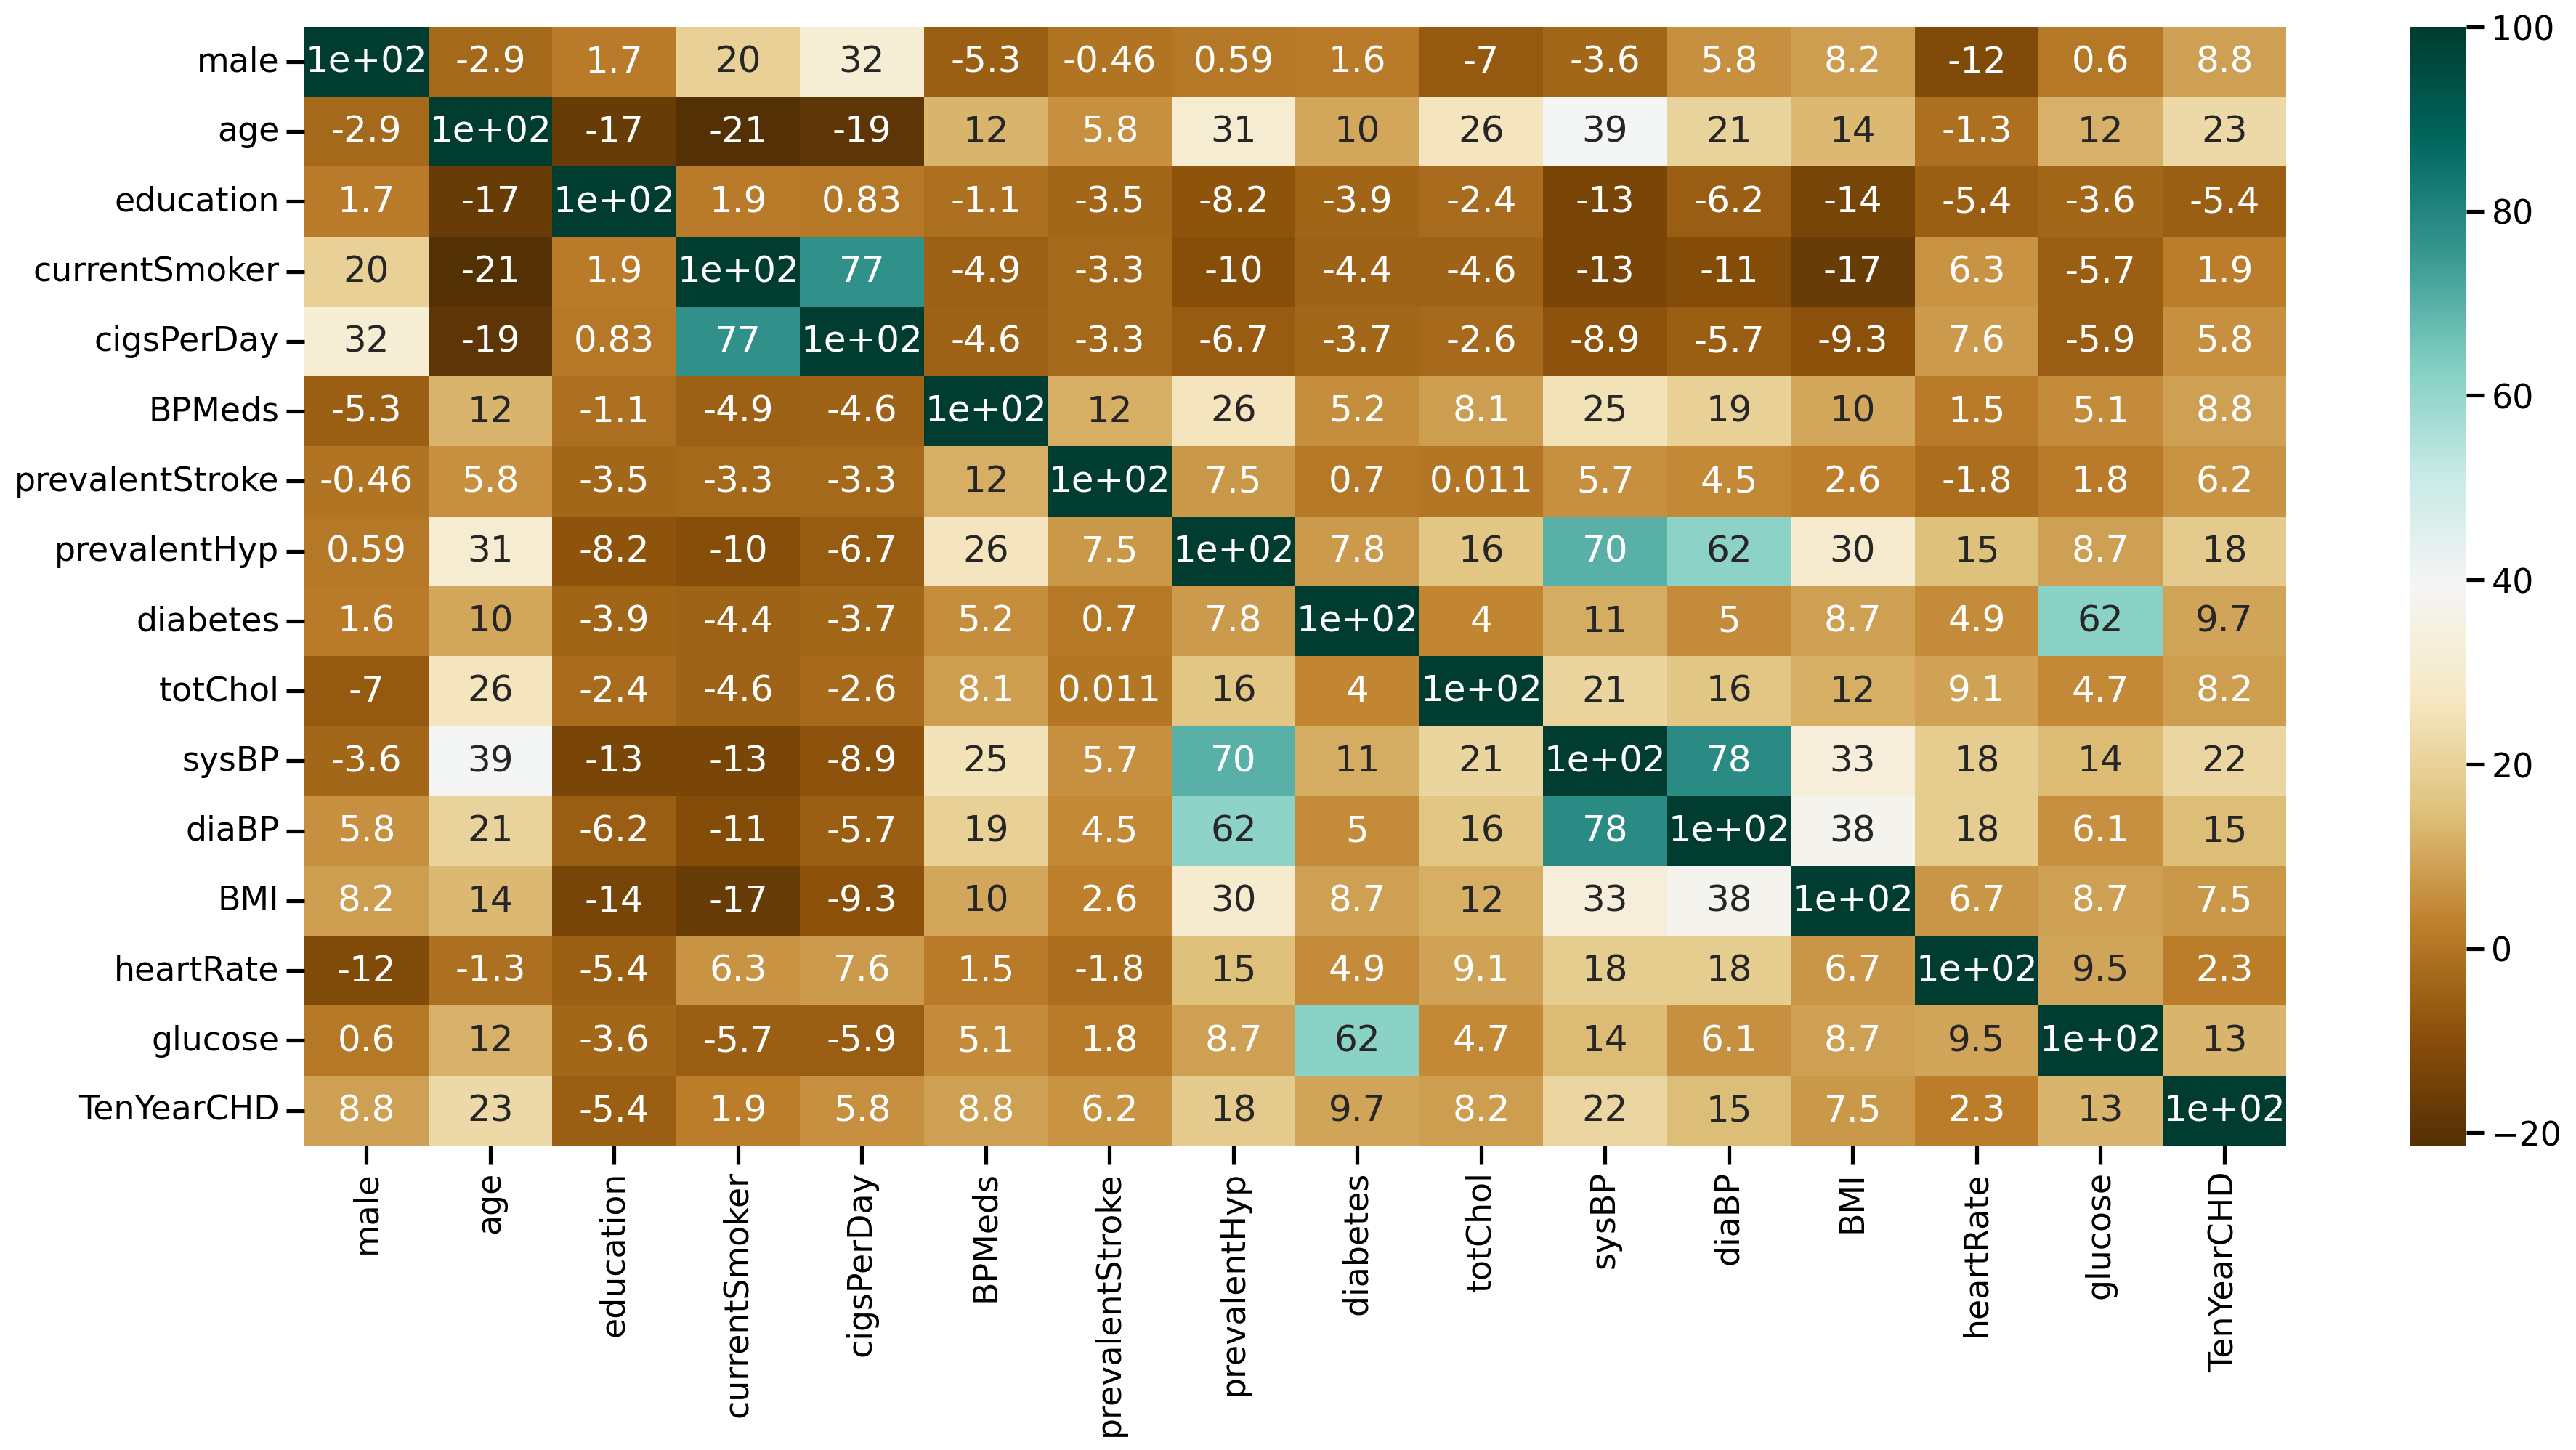

In [146]:
#Pearson Correlation

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='BrBG')

In [173]:
#function for missing value imputation

def impute_median(data):
    return data.fillna(data.median())

In [174]:
#median imputation

df.glucose = df['glucose'].transform(impute_median)
df.education = df['education'].transform(impute_median)
df.heartRate = df['heartRate'].transform(impute_median)
df.totChol = df['totChol'].transform(impute_median)
df.BPMeds = df['BPMeds'].transform(impute_median)

## group by classes that are in relation with other classes

by_currentSmoker = df.groupby(['currentSmoker'])
df.cigsPerDay = by_currentSmoker['cigsPerDay'].transform(impute_median)

by_age = df.groupby(['male','age'])
df.BMI = by_age['BMI'].transform(impute_median)

In [175]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [176]:
#Descriptive Stats

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.798756,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.072774,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.397500,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [151]:
#CHD by Gender Viz.

len(df[df.TenYearCHD> 0])

644

In [152]:
len(df[df.TenYearCHD==0])

3596

/var/folders/nd/xkplpp0x1g10nd2s7rcl8h800000gn/T/ipykernel_17258/4103890367.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['glucose'] , color='orange')
/var/folders/nd/xkplpp0x1g10nd2s7rcl8h800000gn/T/ipykernel_17258/4103890367.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tot

Text(0.5, 1.0, 'Distribution of HeartRate')

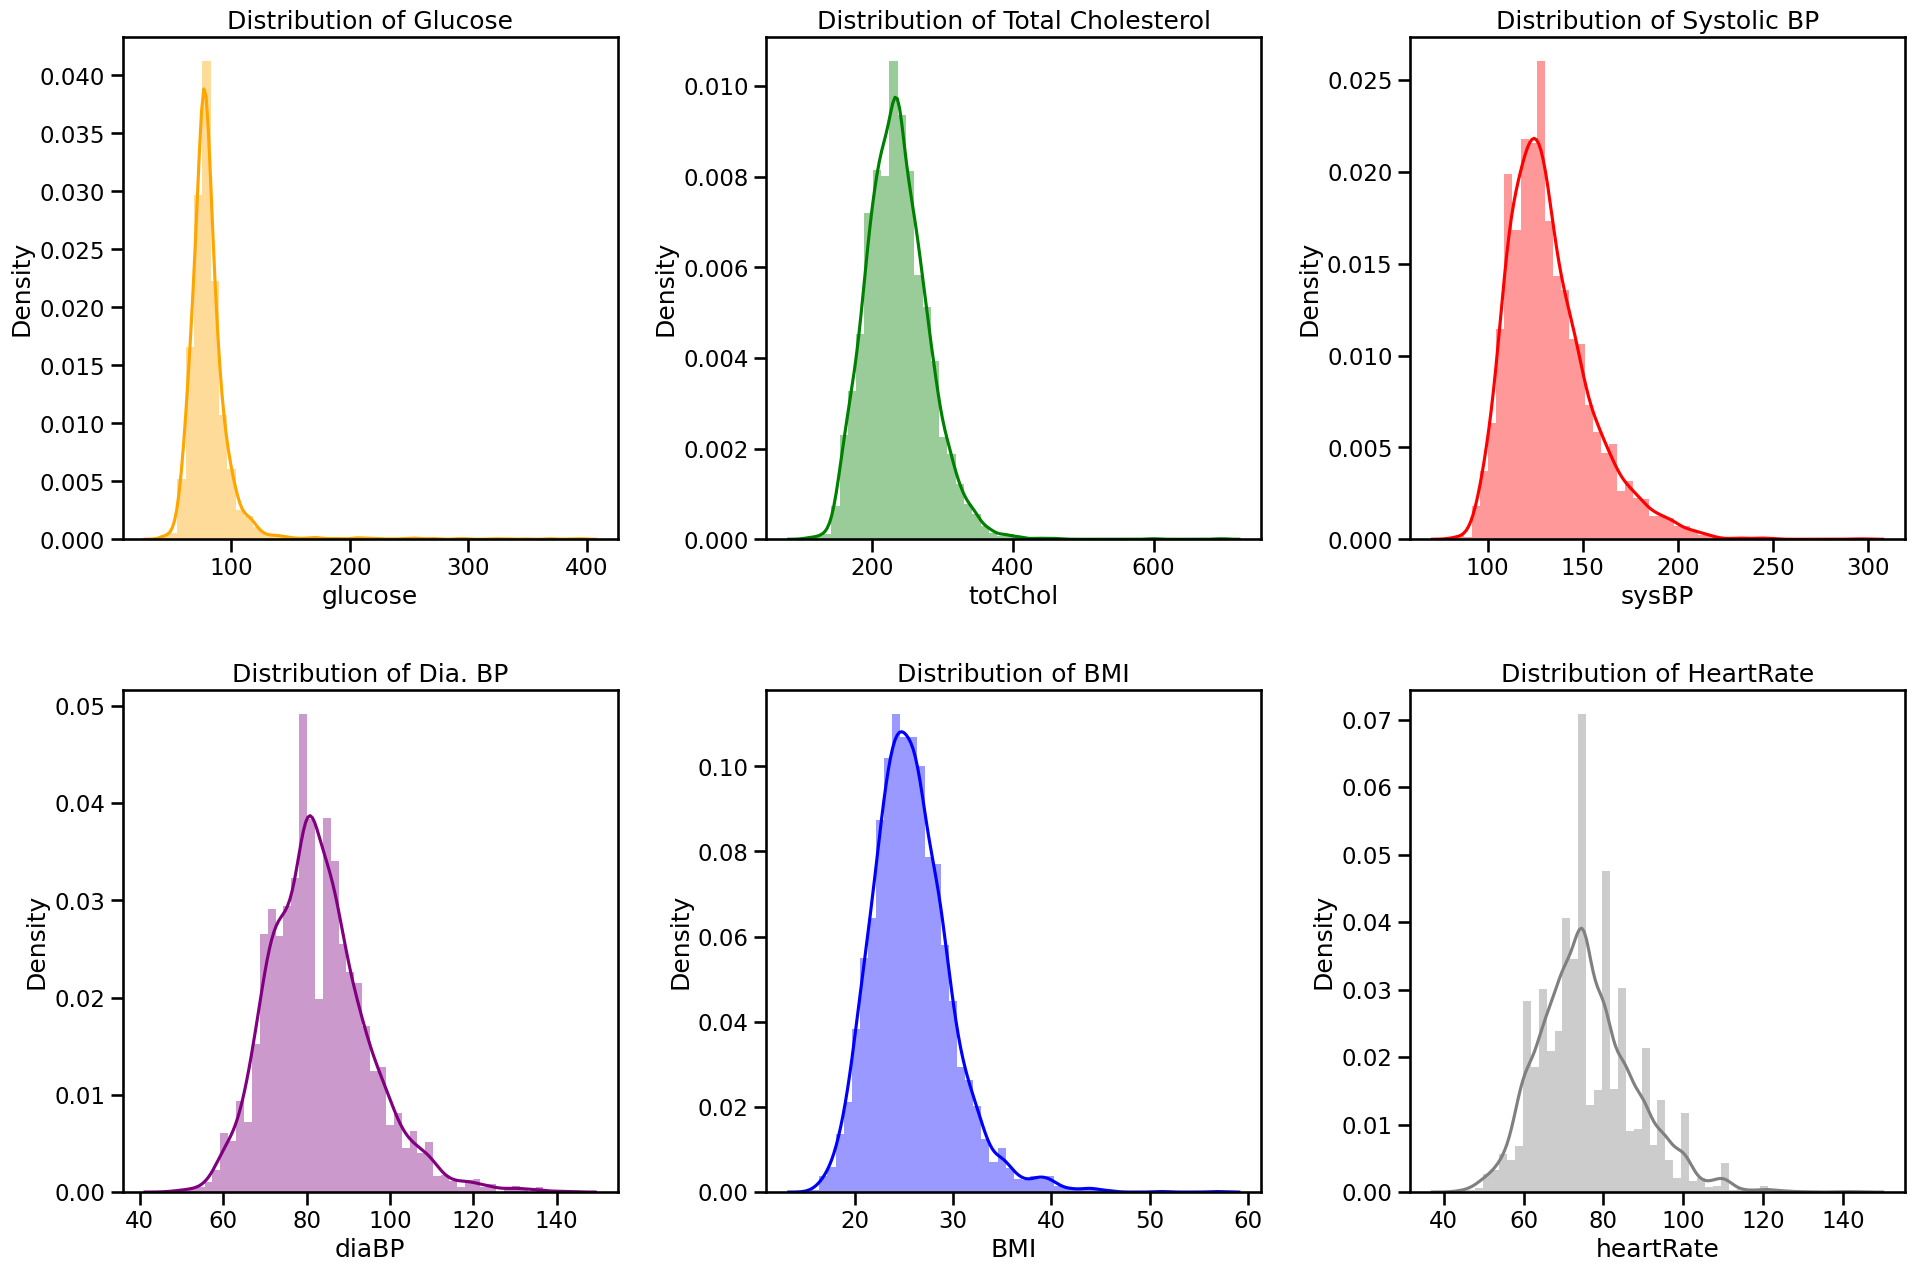

In [27]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

/var/folders/nd/xkplpp0x1g10nd2s7rcl8h800000gn/T/ipykernel_17258/1285524378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=15, kde=True, color='maroon')


Text(0.5, 1.0, 'Agewise distribution of the patients')

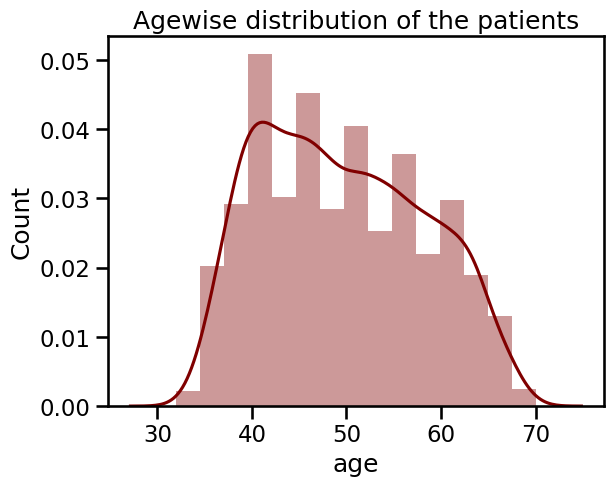

In [28]:
sns.distplot(df['age'], bins=15, kde=True, color='maroon')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

In [177]:
#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

In [178]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,2
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [179]:
df_copy = df.copy()

In [180]:
#Log Transform Continuous Variables

df_copy['log_cigsPerDay'] = np.log1p(df_copy['cigsPerDay'])
df_copy['log_totChol'] = np.log1p(df_copy['totChol'])
#df_copy['log_sysBP'] = np.log1p(df_copy['sysBP'])
df_copy['log_diaBP'] = np.log1p(df_copy['diaBP'])
df_copy['log_BMI'] = np.log1p(df_copy['BMI'])
df_copy['log_heartRate'] = np.log1p(df_copy['heartRate'])
df_copy['log_glucose'] = np.log1p(df_copy['glucose'])
df_copy['log_age'] = np.log1p(df_copy['age'])

df_copy.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age',
              'currentSmoker', 'education', 'enc_hr', 'encode_age'], axis=1, inplace=True)

In [157]:
df_copy.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,log_cigsPerDay,log_totChol,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1,0.0,0,0,0,0,0.000000,5.278115,4.262680,3.331133,4.394449,4.356709,3.688879
1,0,0.0,0,0,0,0,0.000000,5.525453,4.406719,3.392157,4.564348,4.343805,3.850148
2,1,0.0,0,0,0,0,3.044522,5.505332,4.394449,3.271089,4.330733,4.262680,3.891820
3,0,0.0,0,1,0,1,3.433987,5.420535,4.564348,3.387098,4.189655,4.644391,4.127134
4,0,0.0,0,0,0,0,3.178054,5.655992,4.442651,3.182212,4.454347,4.454347,3.850148


In [181]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['TenYearCHD'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['TenYearCHD'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['TenYearCHD'], axis=1).index)                     
norm_df.head()

,male,BPMeds,prevalentStroke,prevalentHyp,diabetes,log_cigsPerDay,log_totChol,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,-0.958976,-1.130247,0.366175,0.417050,-0.179487,-1.296260
1,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,-0.928462,0.389489,-0.094351,0.781994,1.522102,-0.246230,-0.347297
2,1.153113,-0.173569,-0.077014,-0.671241,-0.162437,1.143043,0.279789,-0.182594,-0.042965,0.002631,-0.665854,-0.102079
3,-0.867217,-0.173569,-0.077014,1.489778,-0.162437,1.408036,-0.182514,1.039278,0.747528,-0.914968,1.308555,1.282600
4,-0.867217,-0.173569,-0.077014,-0.671241,-0.162437,1.233898,1.101174,0.164064,-0.648574,0.806637,0.325550,-0.347297


In [182]:
#train-test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

x = norm_df
y = df_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3180, 12), (1060, 12), (3180,), (1060,))

In [183]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)
log_pred

LogisticRegression(solver='liblinear')

array([0, 0, 0, ..., 0, 0, 0])

Accuracy Score : 0.8603773584905661
Cross Validation Score :  0.8484276729559749
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       908
           1       0.83      0.03      0.06       152

    accuracy                           0.86      1060
   macro avg       0.85      0.52      0.49      1060
weighted avg       0.86      0.86      0.80      1060



<Axes: >

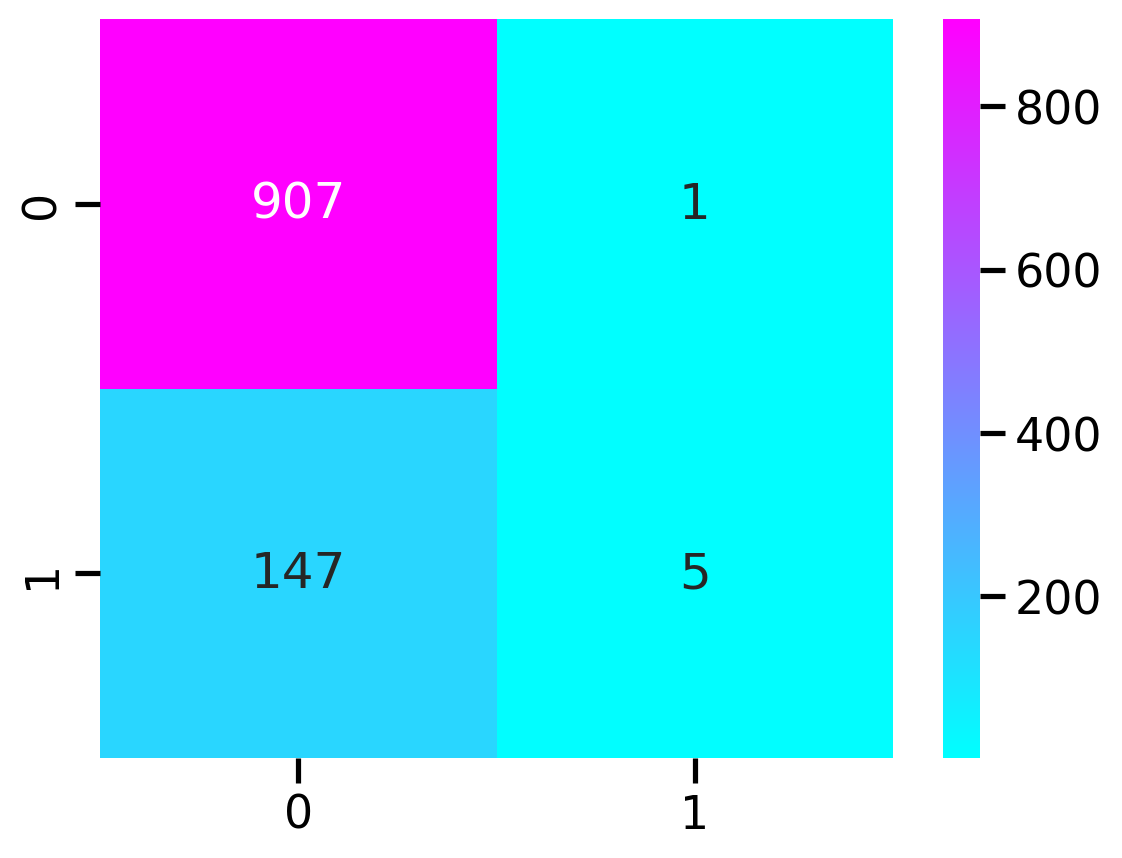

In [184]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(y_test, log_pred))
print ('Cross Validation Score : ', cross_val_score(log_reg, x_train, y_train, cv=5).mean())
print (classification_report(y_test, log_pred))

sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, cmap='cool', fmt='d')

In [80]:
# #Applying SMOTE
# # import SMOTE module from imblearn library
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='not majority')
# x_s_res, y_s_res = smote.fit_sample(x_train, y_train)

# print (y_train.value_counts(), '\n')
# np.bincount(y_s_res)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/subhanuhalder/PycharmProjects/Classifier_Flask_ALabs/.venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py)

In [83]:
# from sklearn.utils._param_validation import MissingValues

In [81]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/subhanuhalder/PycharmProjects/Classifier_Flask_ALabs/.venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py)

In [119]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

In [159]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [160]:
len(X_train)
len(X_test)

3392

848

In [185]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()



TenYearCHD
1.0    644
0.0    611
Name: count, dtype: int64

In [186]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

In [187]:
est_reg = LogisticRegression(solver='liblinear', max_iter=1000, C=1).fit(X_train, y_train)
est_pred = est_reg.predict(x_test)
est_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- log_BMI
- log_age
- log_cigsPerDay
- log_diaBP
- log_glucose
- ...
Feature names seen at fit time, yet now missing:
- BMI
- age
- cigsPerDay
- currentSmoker
- diaBP
- ...


In [166]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 68.60000000000001%
The f1 score for LogReg is: 43.2%
The precision score for LogReg is: 31.0%
The recall score for LogReg is: 71.1%


In [126]:
cv_results = cross_val_score(LogisticRegression, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

<Axes: >

NameError: name 'ax' is not defined

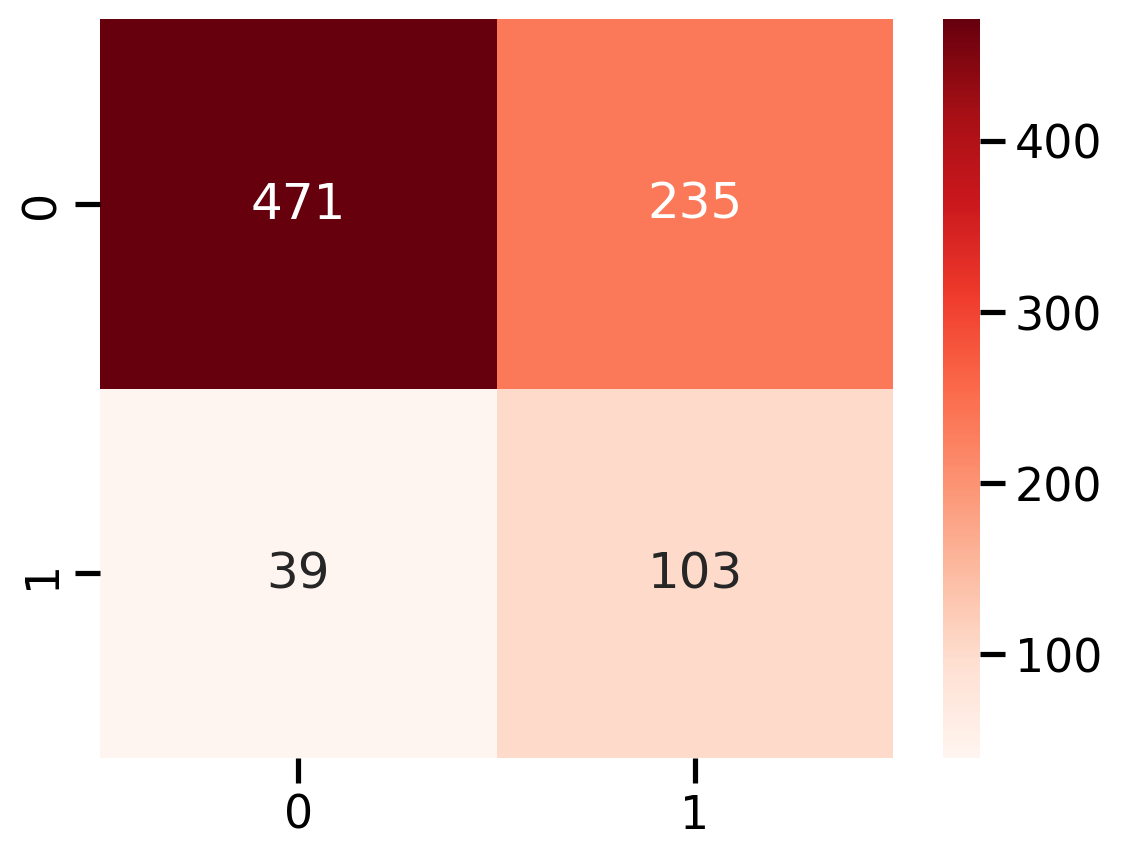

In [97]:

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

In [167]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ")
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred =  normalized_df_reg.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- BMI
- currentSmoker
- education
- enc_hr
- encode_age
- ...


In [194]:

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [195]:
df.shape
df.dtypes

(4240, 16)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [196]:
# Dropping columns education and glucose
df = df.drop(['education'], axis=1)

In [197]:
df = df.dropna()
df.isna().sum()
df.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [198]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:14]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [199]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,667.109932
13,glucose,402.409837
1,age,297.974980
8,totChol,252.958627
3,cigsPerDay,185.115196
10,diaBP,142.920436
6,prevalentHyp,82.342164
7,diabetes,31.711253
4,BPMeds,26.116583
0,male,19.178560


In [200]:
df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


<Axes: >

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0.0,94.0,1,1,0.0,0,1
3160,157.0,84.0,51,696.0,9.0,87.0,1,0,0.0,1,0


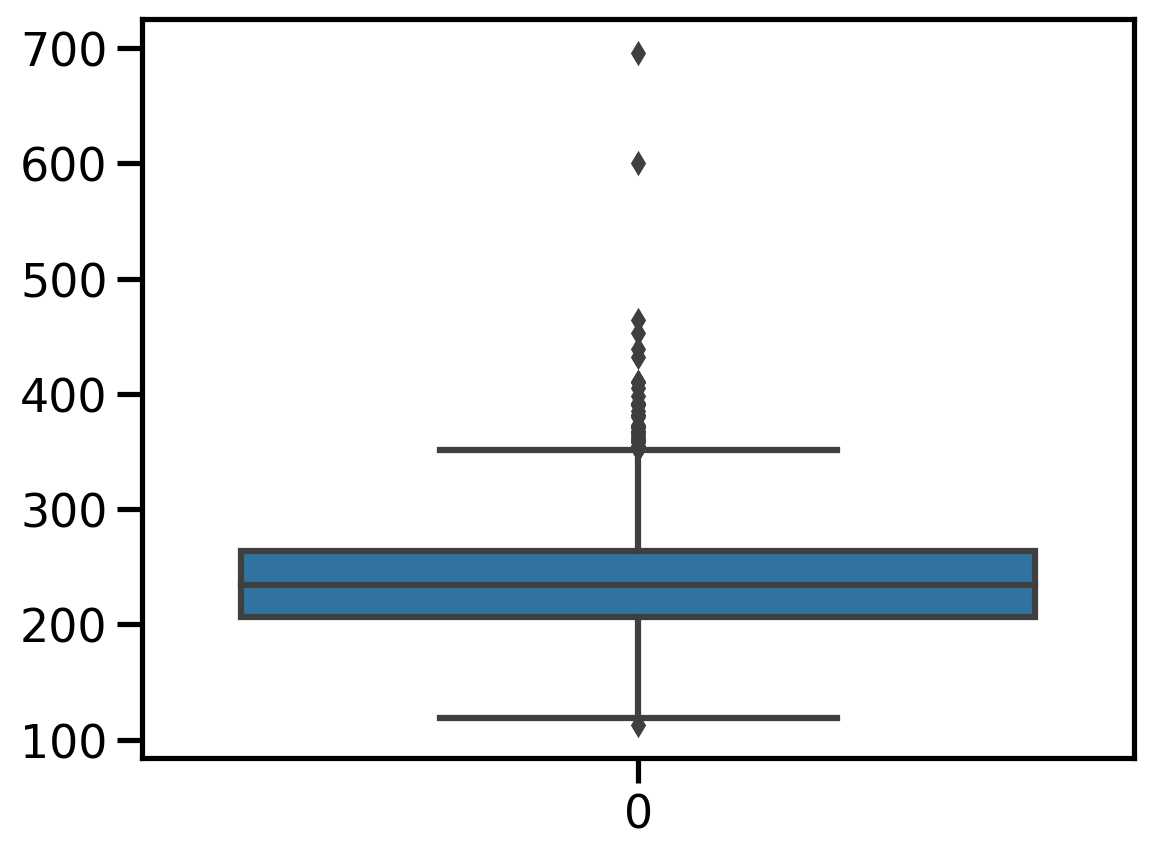

In [201]:


sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

<Axes: >

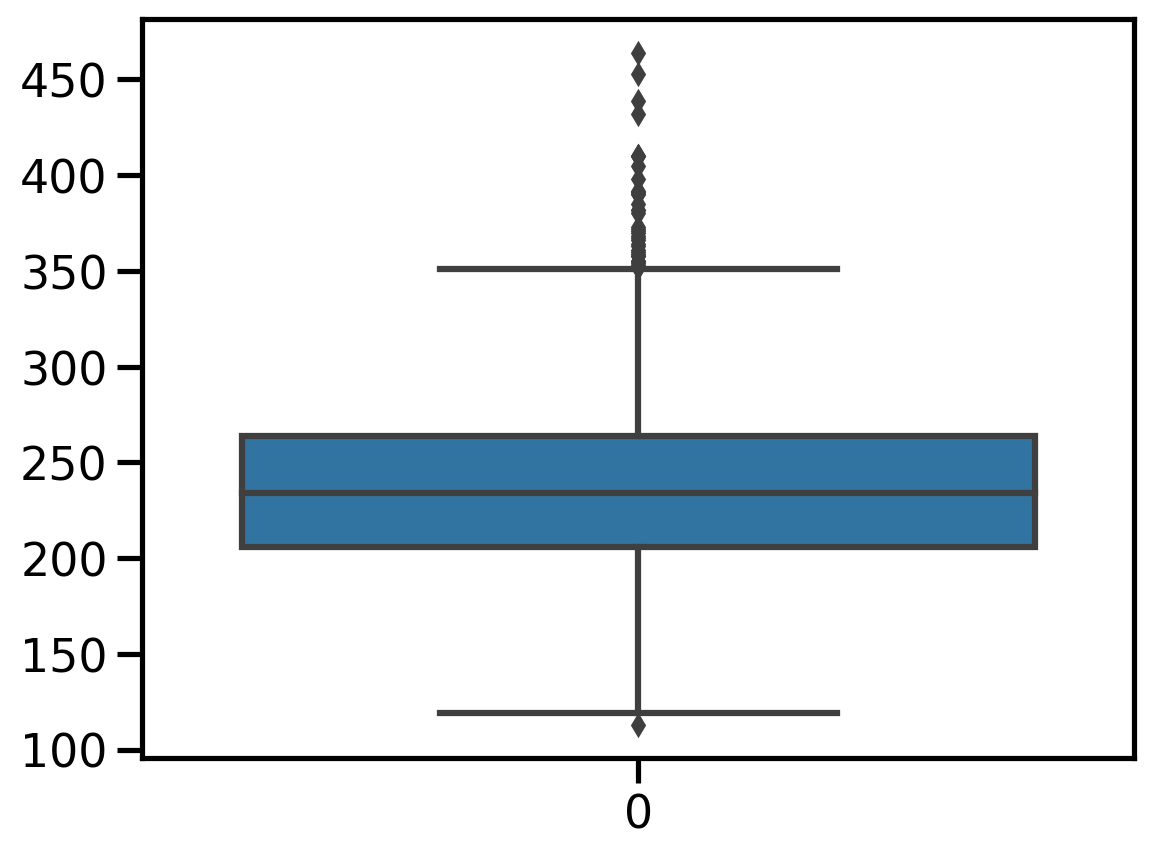

In [202]:
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

In [203]:
df_clean = df

In [204]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [205]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [206]:
len(X_train)
len(X_test)

2999

750

In [208]:
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()


TenYearCHD
0.0    611
1.0    571
Name: count, dtype: int64

In [209]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

In [216]:

model =LogisticRegression()
normalized_df_reg = model.fit(X_train, y_train)

normalized_df_reg_pred = model.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 65.7%
The f1 score for LogReg is: 37.2%
The precision score for LogReg is: 26.0%
The recall score for LogReg is: 65.0%


In [217]:
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = model.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:


Result:
The patient will develop a Heart Disease.


In [218]:
import pickle5 as pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(model,files)

In [214]:
pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-macosx_10_9_universal2.whl size=170512 sha256=1687c6f1e415f2061afbd2993b47df30f79648d94ebe5eafcf2f4790d7e93a0b
  Stored in directory: /Users/subhanuhalder/Library/Caches/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5
Note: you may need to restart the kernel to use updated packages.
